In [1]:
#we import the libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate
from scipy import interpolate
from matplotlib.ticker import FuncFormatter
from matplotlib.ticker import LogLocator
from scipy import linalg
from matplotlib.animation import FuncAnimation
import pandas as pd

In [128]:
#we first define the energy function of the Ising Model 
def total_energy(spins, J=1.0):
    L = spins.shape[0]
    E = 0

    for i in range(L):
        for j in range(L):
            s = spins[i, j]

            # Right neighbor (periodic boundary)
            E -= J * s * spins[i, (j + 1) % L]

            # Bottom neighbor (periodic boundary)
            E -= J * s * spins[(i + 1) % L, j]

    return E

def magnetization(spins):
    return np.sum(spins)

def metropolis_step(spins, E, magnetizations, beta, J=1.0, n_steps=1000, snapshot_steps=None):
    L = spins.shape[0]
    snapshots = {}

    for step in range(n_steps):
        # Pick a random spin
        i = np.random.randint(0, L)
        j = np.random.randint(0, L)

        s = spins[i, j]

        # Sum of nearest neighbors (periodic boundary conditions)
        neighbors = (
            spins[(i + 1) % L, j] +
            spins[(i - 1) % L, j] +
            spins[i, (j + 1) % L] +
            spins[i, (j - 1) % L]
        )

        # Energy change if the spin is flipped
        dE = 2 * J * s * neighbors

        # Metropolis acceptance criterion
        if dE <= 0 or np.random.rand() < np.exp(-beta * dE):
            spins[i, j] *= -1
            E += dE

        # Store magnetization every step
       
        magnetizations.append(np.sum(spins))

        # Store snapshots at logarithmic times
        if snapshot_steps is not None and step in snapshot_steps:
            snapshots[step] = spins.copy()

    return spins, E, magnetizations, snapshots


In [129]:
L = 20 #dimension of the lattice

spins = np.random.choice([-1, 1], size=(L, L)) #it create randomly a LxL lattice with spins up and down, with avarege
E = total_energy(spins) #we calculate the total energy of the lattice
print("Initial Energy:", E) #we see that each time that we run the code the energy is different, since the spins in the lattice is created randomly

M = magnetization(spins) #we calculate the magnetization of the lattice
print("Initial Magnetization:", M)

Initial Energy: 28.0
Initial Magnetization: 14


In [156]:
L = 20 #dimension of the lattice
spins = np.random.choice([-1, 1], size=(L, L))

snapshot_steps = [1, 10, 100, 1000, 10000, 1000000]
snapshots = {}

spins = np.random.choice([-1, 1], size=(L, L), p=[0.5, 0.5])
E = total_energy(spins)

#now we do the Metropolis algorithm
beta = 1 #1/kT
n_steps = 1000001 #number of Metropolis steps
magnetizations = [] #list to store magnetization values during the simulation

spins, E, magnetizations, snapshots = metropolis_step(
    spins,
    E,
    magnetizations,
    beta,
    n_steps=n_steps,
    snapshot_steps=snapshot_steps
)

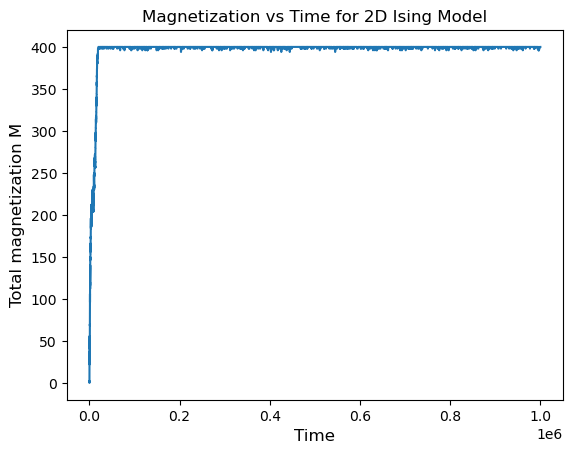

In [157]:
#we plot the magnetization as a function of time
plt.plot(np.arange(len(magnetizations)), magnetizations)
plt.xlabel('Time', fontsize = 12)
plt.ylabel('Total magnetization M', fontsize = 12)
plt.title('Magnetization vs Time for 2D Ising Model', fontsize = 12)
plt.show()

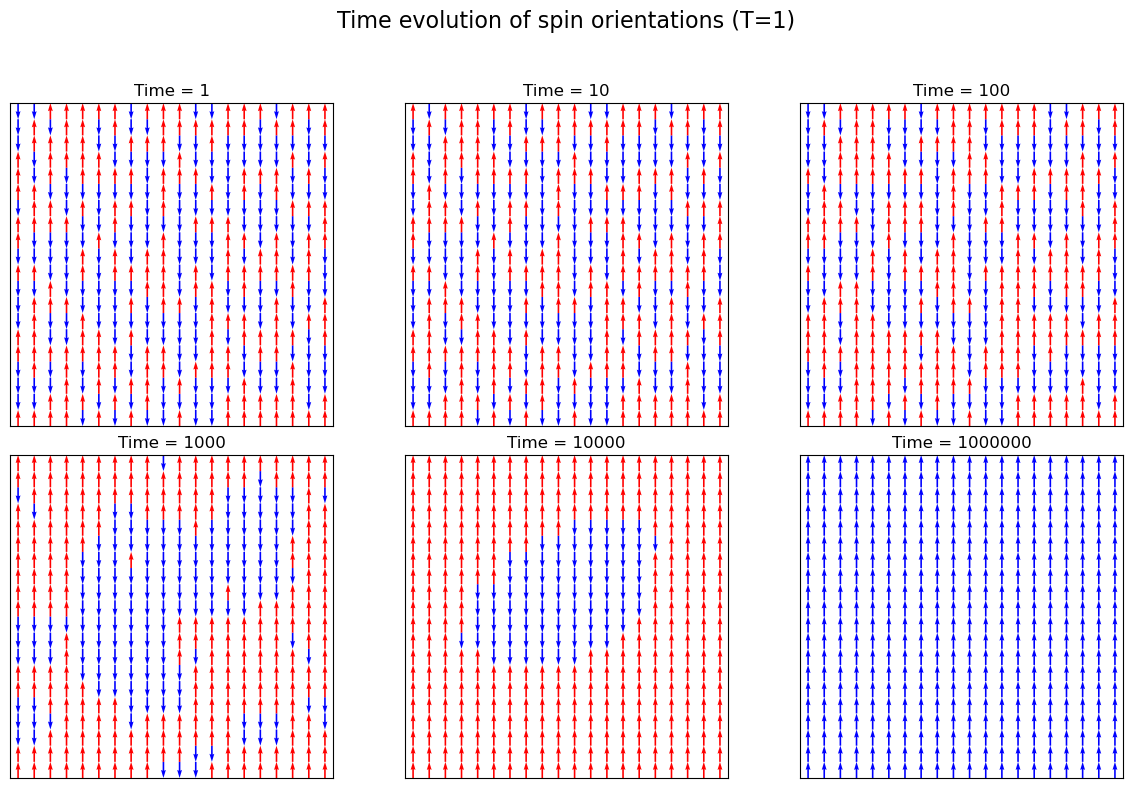

In [158]:
fig, axes = plt.subplots(2, 3, figsize=(12, 8))
axes = axes.flatten()

x, y = np.meshgrid(np.arange(L), np.arange(L))

for ax, step in zip(axes, snapshot_steps):
    spins_snapshot = snapshots[step]

    U = np.zeros((L, L))
    V = spins_snapshot

    colors = np.where(spins_snapshot > 0, 1, 0)

    q = ax.quiver(
        x, y, U, V,
        colors,
        cmap='bwr',
        angles='xy',
        scale_units='xy',
        scale=1,
        width=0.005,
        pivot='middle'
    )

    # Tempo logaritmico in Monte Carlo steps
    log_time = np.log10(step)

    ax.set_title(f"Time = {step:.0f}")
    ax.set_aspect('equal')
    ax.set_xlim(-0.5, L - 0.5)
    ax.set_ylim(-0.5, L - 0.5)
    ax.set_xticks([])
    ax.set_yticks([])

plt.suptitle("Time evolution of spin orientations (T=1)", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


In [148]:
#now we do changing the temeprature 

L = 20 #dimension of the lattice
spins = np.random.choice([-1, 1], size=(L, L))

snapshot_steps = [1, 10, 100, 1000, 10000, 1000000]
snapshots = {}

spins = np.random.choice([-1, 1], size=(L, L), p=[0.5, 0.5])
E = total_energy(spins)

#now we do the Metropolis algorithm
beta = 1/2 #1/kT, T = 2
n_steps = 1000001 #number of Metropolis steps
magnetizations = [] #list to store magnetization values during the simulation

spins, E, magnetizations, snapshots = metropolis_step(
    spins,
    E,
    magnetizations,
    beta,
    n_steps=n_steps,
    snapshot_steps=snapshot_steps
)

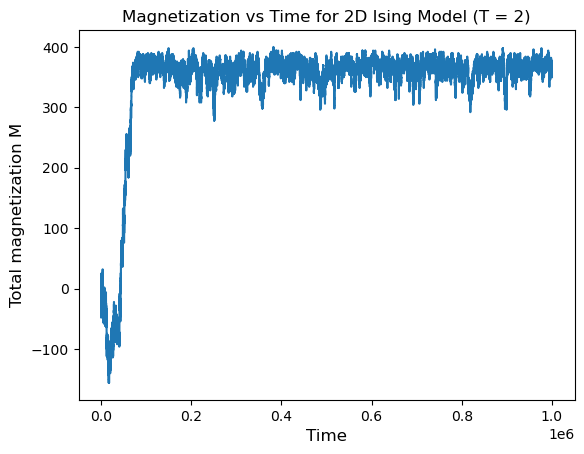

In [149]:
#we plot the magnetization as a function of time
plt.plot(np.arange(len(magnetizations)), magnetizations)
plt.xlabel('Time', fontsize = 12)
plt.ylabel('Total magnetization M', fontsize = 12)
plt.title('Magnetization vs Time for 2D Ising Model (T = 2)', fontsize = 12)
plt.show()

In [152]:
#now we do changing the temeprature 

L = 20 #dimension of the lattice
spins = np.random.choice([-1, 1], size=(L, L))

snapshot_steps = [1, 10, 100, 1000, 10000, 1000000]
snapshots = {}

spins = np.random.choice([-1, 1], size=(L, L), p=[0.5, 0.5])
E = total_energy(spins)

#now we do the Metropolis algorithm
beta = 1/3 #1/kT, T = 2
n_steps = 1000001 #number of Metropolis steps
magnetizations = [] #list to store magnetization values during the simulation

spins, E, magnetizations, snapshots = metropolis_step(
    spins,
    E,
    magnetizations,
    beta,
    n_steps=n_steps,
    snapshot_steps=snapshot_steps
)

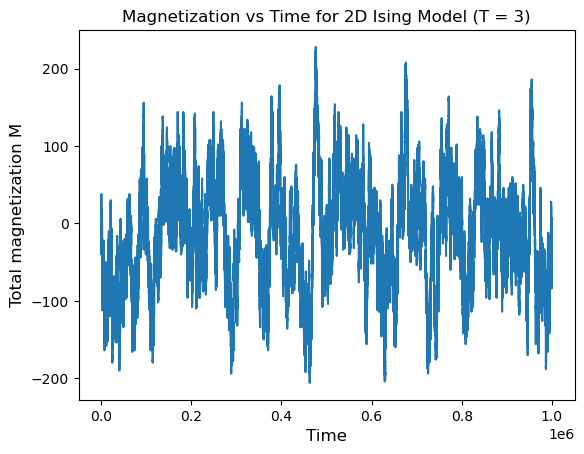

In [153]:
#we plot the magnetization as a function of time
plt.plot(np.arange(len(magnetizations)), magnetizations)
plt.xlabel('Time', fontsize = 12)
plt.ylabel('Total magnetization M', fontsize = 12)
plt.title('Magnetization vs Time for 2D Ising Model (T = 3)', fontsize = 12)
plt.show()

Exercise 10.11 

In [2]:
#define the adjacent pairs function
def adjacent_pairs(L):
    pairs = []
    for i in range(L):
        for j in range(L):
            if j+1 < L:  # horizontal (right)
                pairs.append(((i, j), (i, j+1)))
            if i+1 < L:  # vertical (down)
                pairs.append(((i, j), (i+1, j)))
    return pairs

#energy function
def energy_of_dimers(dimers, J=1.0):
    return -J * len(dimers)

#metropolis function for dimers
def metropolis_sweep(lattice, dimers, pairs, beta, J=1.0):
    L = lattice.shape[0]
    n_moves = len(pairs)
    for _ in range(5000):
        #we choose a random pair
        (i1, j1), (i2, j2) = pairs[np.random.randint(n_moves)]
        occupied_1 = lattice[i1, j1] == 1
        occupied_2 = lattice[i2, j2] == 1

        #both side lattice empty -> propose to add a dimer
        if not occupied_1 and not occupied_2:
            lattice[i1, j1] = 1
            lattice[i2, j2] = 1
            dimers.add(((i1, j1), (i2, j2)))

        # both side occupied -> propose to remove a dimer
        elif occupied_1 and occupied_2:
            # check if they form a dimer
            key1 = ((i1, j1), (i2, j2))
            if key1 in dimers:
                if np.random.rand() < np.exp(-beta * J):
                    lattice[i1, j1] = 0
                    lattice[i2, j2] = 0
                    if key1 in dimers:
                        dimers.remove(key1)
    return lattice, dimers

#function to perform the simulation 
def anneal_dimers(L=10, J=1.0, beta_start=0.0, beta_end=1.0,
                  n_temps=50, sweeps_per_temp=5, snapshots=None, seed=None):
    if seed is not None:
        np.random.seed(seed)

    lattice = np.zeros((L, L), dtype=np.int8)
    dimers = set()
    pairs = adjacent_pairs(L)

    betas = np.linspace(beta_start, beta_end, n_temps)
    results = {}

    step_counter = 0
    for beta in betas:
        for _ in range(sweeps_per_temp):
            lattice, dimers = metropolis_sweep(lattice, dimers, pairs, beta, J=J)
            step_counter += 1
            if snapshots and step_counter in snapshots:
                results[step_counter] = (lattice.copy(), dimers.copy())
    return results

#now we define the function where we introude a cooling time tau 
def anneal_exponential(L=50, J=1.0, T0=1.0, tau=10000, n_steps=50000, snapshots=None, seed=None):
    if seed is not None:
        np.random.seed(seed)

    lattice = np.zeros((L, L), dtype=np.int8)
    dimers = set()
    pairs = adjacent_pairs(L)

    results = {}
    for k in range(1, n_steps+1):
        T = T0 * np.exp(-k / tau)
        beta = 1.0 / T
        lattice, dimers = metropolis_sweep(lattice, dimers, pairs, beta, J=J)
        if snapshots and k in snapshots:
            results[k] = (lattice.copy(), dimers.copy())
    return results


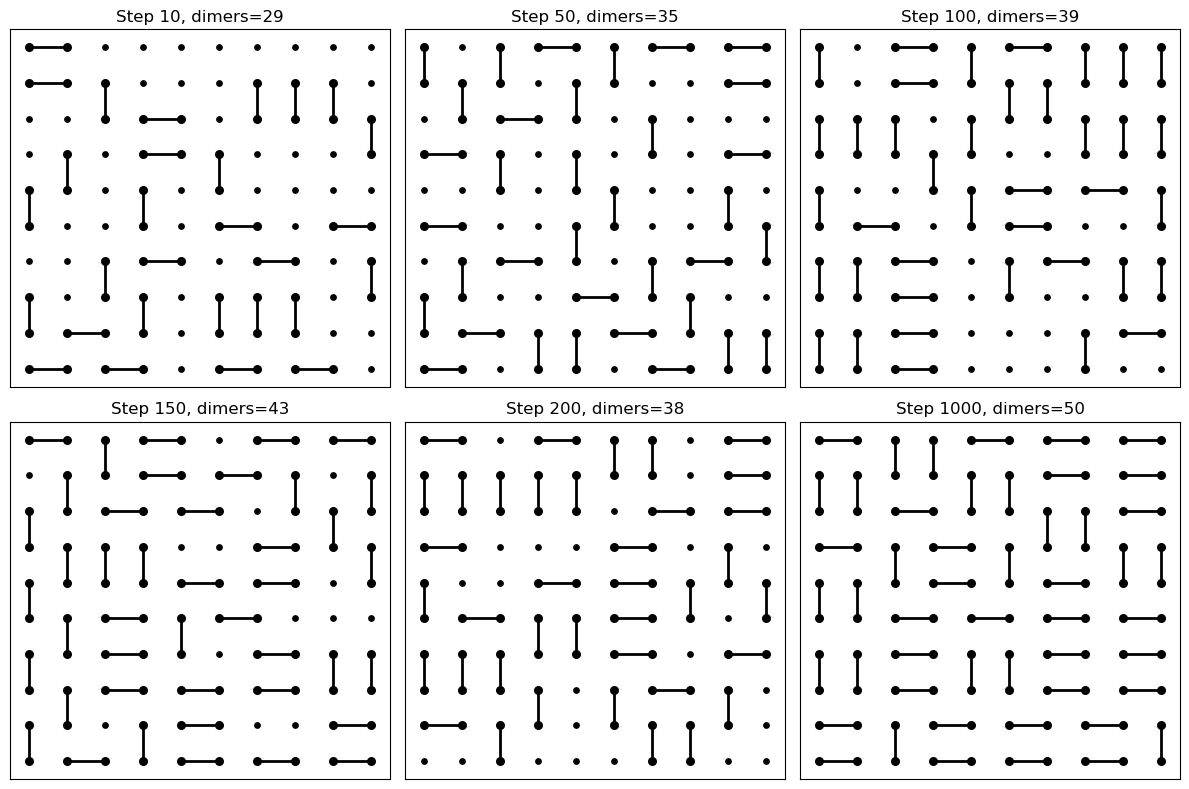

In [3]:
L = 10

snapshots = [10, 50, 100, 150, 200, 1000]

results = anneal_dimers(
    L=L,
    J=1.0,
    beta_start=0.0,
    beta_end=10.0,
    n_temps=50,
    sweeps_per_temp=20,
    snapshots=snapshots, 
    seed=42
)

# --- plotting 2x3 ---
fig, axes = plt.subplots(2, 3, figsize=(12, 8))

for ax, step in zip(axes.flat, snapshots):
    lattice, dimers = results[step]
    for i in range(L):
        for j in range(L):
            ax.scatter(j, i, c='black', s=15)
    for ((i1, j1), (i2, j2)) in dimers:
        ax.plot([j1, j2], [i1, i2], 'k-', lw=2)
        ax.scatter([j1, j2], [i1, i2], c='black', s=30)

    ax.set_xlim(-0.5, L-0.5)
    ax.set_ylim(-0.5, L-0.5)
    ax.invert_yaxis()
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title(f"Step {step}, dimers={len(dimers)}")

plt.tight_layout()
plt.show()


In [4]:
# ============================================================
# 1. Generate adjacent pairs (horizontal + vertical)
# ============================================================
def adjacent_pairs(L):
    pairs = []
    for i in range(L):
        for j in range(L):
            if j + 1 < L:  # horizontal
                pairs.append(((i, j), (i, j+1)))
            if i + 1 < L:  # vertical
                pairs.append(((i, j), (i+1, j)))
    return pairs

# ============================================================
# 2. Energy function: E = -J * (# dimers)
# ============================================================
def energy_of_dimers(dimers, J=1.0):
    return -J * len(dimers)

# ============================================================
# 3. Metropolis sweep: L^2 moves per sweep
# ============================================================
def metropolis_sweep(lattice, dimers, pairs, beta, J=1.0):
    L = lattice.shape[0]
    n_moves = L * L  # one sweep = L^2 attempts

    for _ in range(n_moves):
        # choose random adjacent pair
        (i1, j1), (i2, j2) = pairs[np.random.randint(len(pairs))]

        occ1 = lattice[i1, j1] == 1
        occ2 = lattice[i2, j2] == 1

        # Case 1: both empty → add dimer
        if not occ1 and not occ2:
            lattice[i1, j1] = 1
            lattice[i2, j2] = 1
            dimers.add(((i1, j1), (i2, j2)))

        # Case 2: both occupied → remove dimer with Boltzmann prob
        elif occ1 and occ2:
            key = ((i1, j1), (i2, j2))
            if key in dimers:
                if np.random.rand() < np.exp(-beta * J):
                    lattice[i1, j1] = 0
                    lattice[i2, j2] = 0
                    dimers.remove(key)

    return lattice, dimers

# ============================================================
# 4. Exponential annealing
# ============================================================
def anneal_exponential(
    L=50, J=1.0, T0=1.0, tau=10000,
    n_steps=50000, snapshots=None, seed=None
):
    if seed is not None:
        np.random.seed(seed)

    lattice = np.zeros((L, L), dtype=np.int8)
    dimers = set()
    pairs = adjacent_pairs(L)

    energies = []
    times = []
    results = {}

    min_energy = 0
    min_energy_time = 0

    for k in range(1, n_steps + 1):

        # exponential cooling
        T = T0 * np.exp(-k / tau)
        beta = 1.0 / T

        # one sweep
        lattice, dimers = metropolis_sweep(lattice, dimers, pairs, beta, J=J)

        # compute energy
        E = energy_of_dimers(dimers, J)
        energies.append(E)
        times.append(k)

        # track minimum
        if E < min_energy:
            min_energy = E
            min_energy_time = k

        # save snapshots
        if snapshots and k in snapshots:
            results[k] = (lattice.copy(), dimers.copy())

    return results, energies, times, min_energy, min_energy_time


In [18]:
L = 10 #we now do only the simulation of L = 10 just to see that hte method works, since it is visually possible to see it
snapshots = [1, 50, 500, 1000, 5000, 20000]

results, energies, times, E_min, t_min = anneal_exponential(
    L=L,
    J=1.0,
    T0=1.0,
    tau=10000,
    n_steps=20000,
    snapshots=snapshots,
    seed=42
)

print("Minimum energy:", E_min)
print("Reached at Monte Carlo step:", t_min)
print("Number of dimers:", -E_min)

Minimum energy: -50.0
Reached at Monte Carlo step: 10040
Number of dimers: 50.0


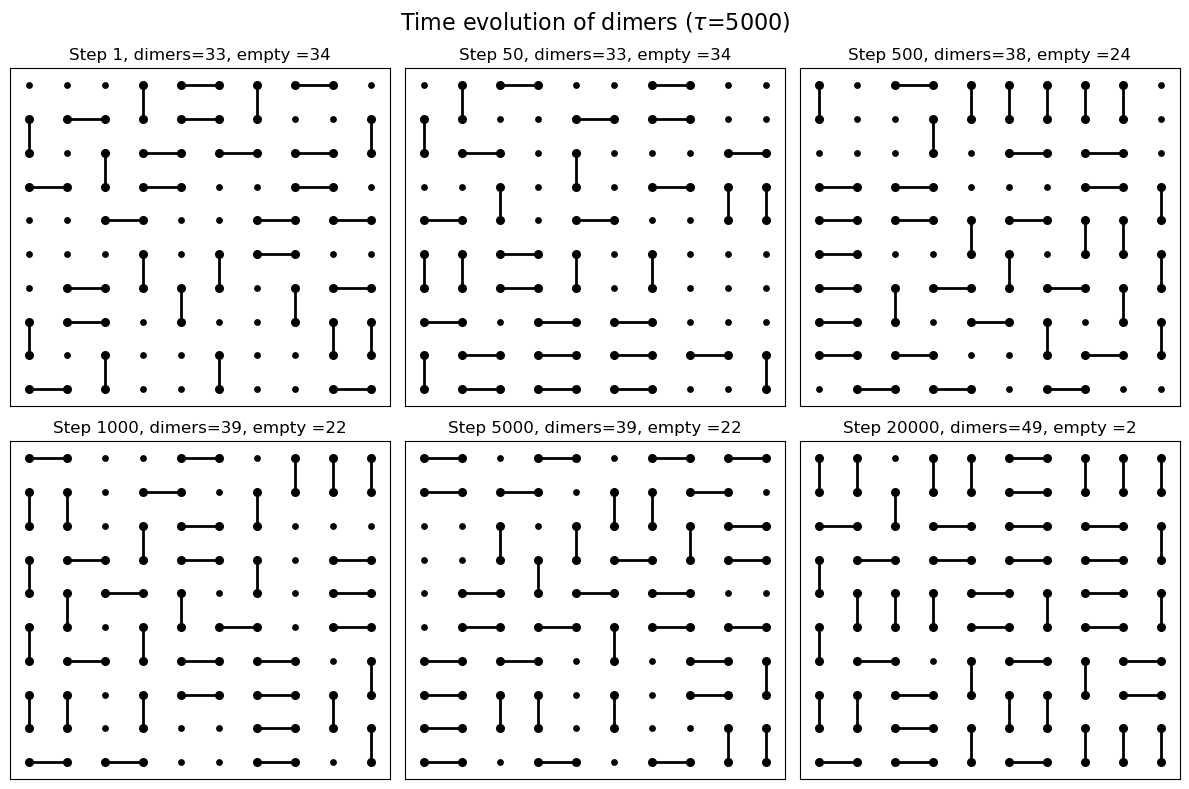

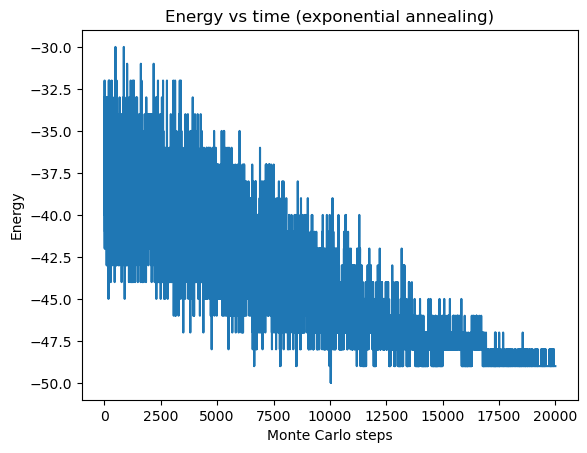

In [19]:
# ============================================================
# 6. PLOT SNAPSHOTS
# ============================================================
fig, axes = plt.subplots(2, 3, figsize=(12, 8))

for ax, step in zip(axes.flat, snapshots):
    lattice, dimers = results[step]

    # plot points
    for i in range(L):
        for j in range(L):
            ax.scatter(j, i, c='black', s=15)

    # plot dimers
    for ((i1, j1), (i2, j2)) in dimers:
        ax.plot([j1, j2], [i1, i2], 'k-', lw=2)
        ax.scatter([j1, j2], [i1, i2], c='black', s=30)

    ax.set_xlim(-0.5, L - 0.5)
    ax.set_ylim(-0.5, L - 0.5)
    ax.invert_yaxis()
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title(f"Step {step}, dimers={len(dimers)}, empty ={L*L - 2*len(dimers)}")

plt.suptitle("Time evolution of dimers ($\\tau$=5000)", fontsize=16)
plt.tight_layout()
plt.show()

# ============================================================
# 7. PLOT ENERGY VS TIME
# ============================================================
plt.plot(times, energies)
plt.xlabel("Monte Carlo steps")
plt.ylabel("Energy")
plt.title("Energy vs time (exponential annealing)")
plt.show()


In [ ]:
#now we change tau and L = 50 
snapshots = [1, 50, 500, 1000, 5000, 20000]
L=50

results, energies, times, E_min, t_min = anneal_exponential(
    L=50,
    J=1.0,
    T0=1.0,
    tau=10000,
    n_steps=20000,
    snapshots=snapshots,
    seed=42
)

print("Minimum energy:", E_min)
print("Number of dimers:", -E_min)
print("True number of dimers:", 1/2*L*L)

Minimum energy: -1233.0
Number of dimers: 1233.0
True number of dimers: 1250.0


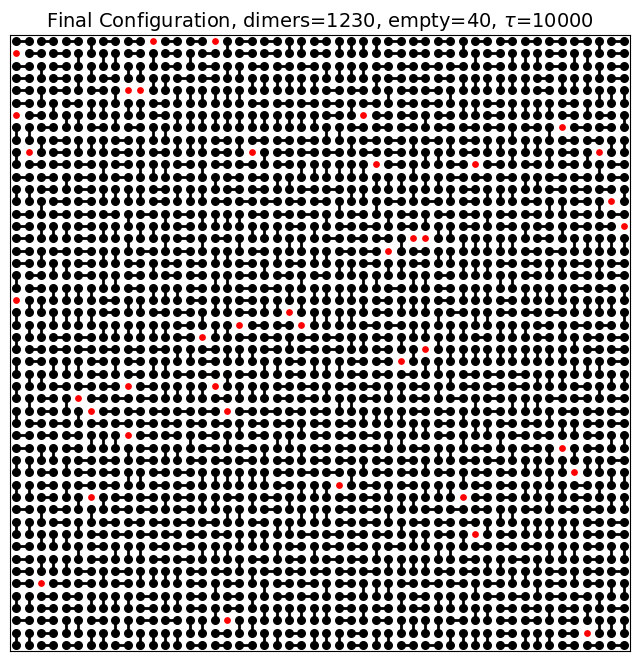

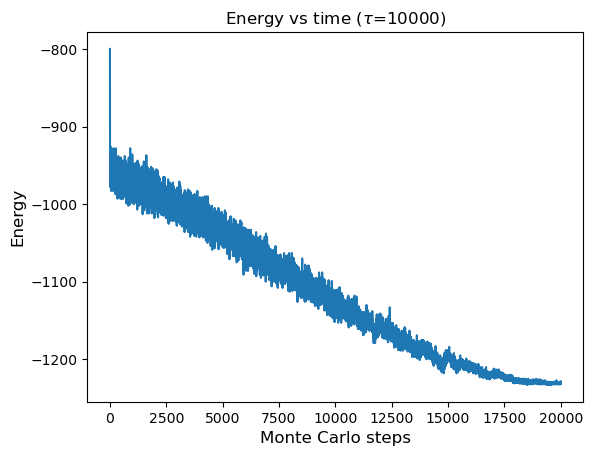

In [36]:
step = snapshots[-1]   # we take the last snapshot
lattice, dimers = results[step]

plt.figure(figsize=(8, 8))

# plot punti
for i in range(L):
    for j in range(L):
        plt.scatter(j, i, c='red', s=15)

# plot dimeri
for ((i1, j1), (i2, j2)) in dimers:
    plt.plot([j1, j2], [i1, i2], 'k-', lw=2)
    plt.scatter([j1, j2], [i1, i2], c='black', s=30)

plt.xlim(-0.5, L - 0.5)
plt.ylim(-0.5, L - 0.5)
plt.gca().invert_yaxis()
plt.xticks([])
plt.yticks([])

plt.title(f"Final Configuration, dimers={len(dimers)}, empty={L*L - 2*len(dimers)}, $\\tau$=10000", fontsize = 14)
plt.show()

# ============================================================
# 7. PLOT ENERGY VS TIME
# ============================================================
plt.plot(times, energies)
plt.xlabel("Monte Carlo steps",fontsize = 12)
plt.ylabel("Energy",fontsize = 12)
plt.title("Energy vs time ($\\tau$=10000)",fontsize = 12)
plt.show()


In [37]:
snapshots = [1, 50, 500, 1000, 5000, 20000]

results, energies, times, E_min, t_min = anneal_exponential(
    L=50,
    J=1.0,
    T0=1.0,
    tau=5000,
    n_steps=20000,
    snapshots=snapshots,
    seed=42
)

print("Minimum energy:", E_min)
print("Number of dimers:", -E_min)
print("True number of dimers:", 1/2*L*L)

Minimum energy: -1228.0
Number of dimers: 1228.0
True number of dimers: 1250.0


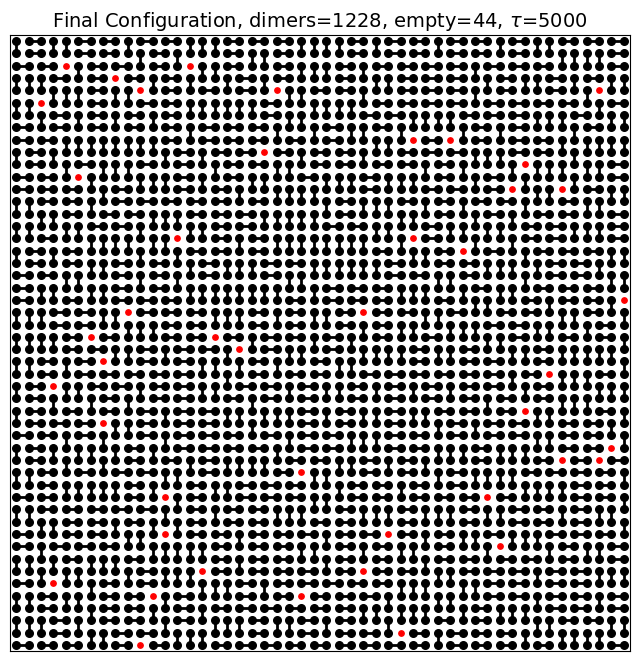

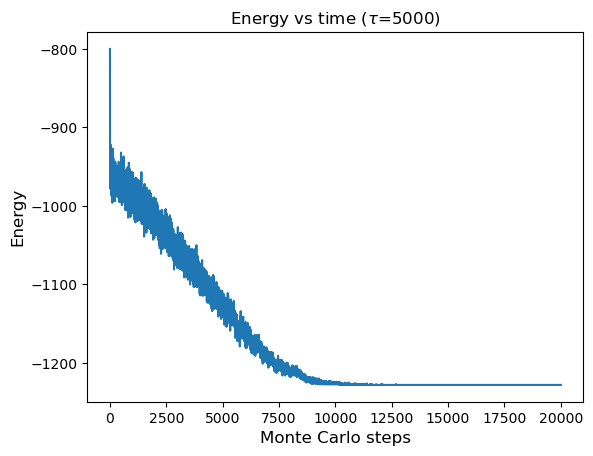

In [38]:
step = snapshots[-1]   # we take the last snapshot
lattice, dimers = results[step]

plt.figure(figsize=(8, 8))

# plot punti
for i in range(L):
    for j in range(L):
        plt.scatter(j, i, c='red', s=15)

# plot dimeri
for ((i1, j1), (i2, j2)) in dimers:
    plt.plot([j1, j2], [i1, i2], 'k-', lw=2)
    plt.scatter([j1, j2], [i1, i2], c='black', s=30)

plt.xlim(-0.5, L - 0.5)
plt.ylim(-0.5, L - 0.5)
plt.gca().invert_yaxis()
plt.xticks([])
plt.yticks([])

plt.title(f"Final Configuration, dimers={len(dimers)}, empty={L*L - 2*len(dimers)}, $\\tau$=5000", fontsize = 14)
plt.show()

# ============================================================
# 7. PLOT ENERGY VS TIME
# ============================================================
plt.plot(times, energies)
plt.xlabel("Monte Carlo steps", fontsize = 12)
plt.ylabel("Energy", fontsize = 12)
plt.title("Energy vs time ($\\tau$=5000)", fontsize = 12)
plt.show()


In [39]:
snapshots = [1, 50, 500, 1000, 5000, 20000]
L=50

results, energies, times, E_min, t_min = anneal_exponential(
    L=50,
    J=1.0,
    T0=1.0,
    tau=2000,
    n_steps=20000,
    snapshots=snapshots,
    seed=42
)

print("Minimum energy:", E_min)
print("Number of dimers:", -E_min)
print("True number of dimers:", 1/2*L*L)

Minimum energy: -1224.0
Number of dimers: 1224.0
True number of dimers: 1250.0


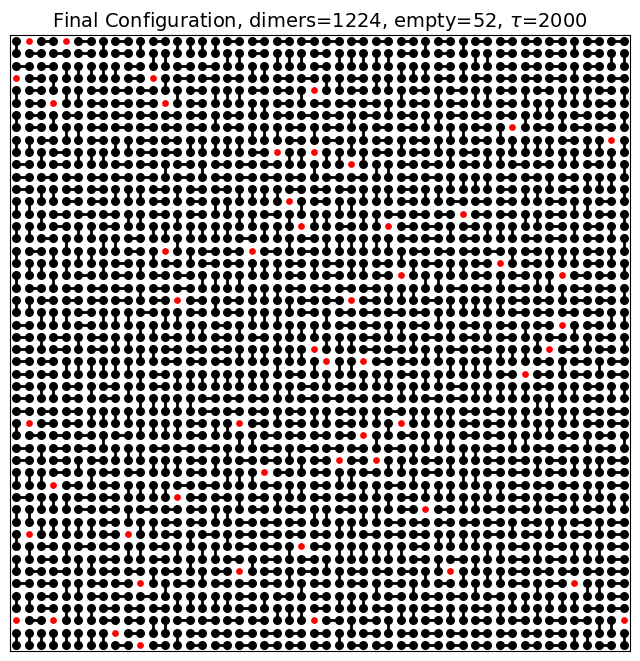

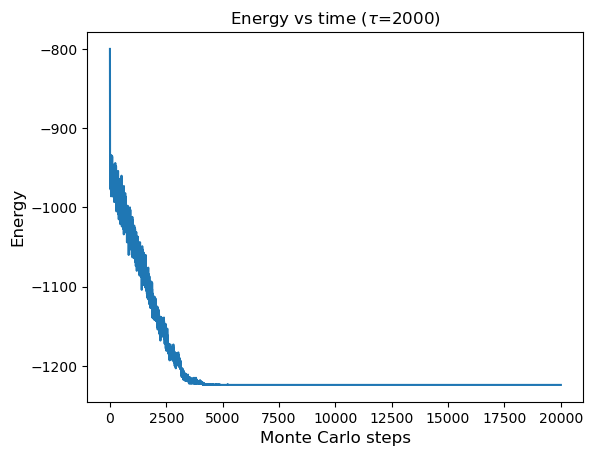

In [40]:
step = snapshots[-1]   # we take the last snapshot
lattice, dimers = results[step]

plt.figure(figsize=(8, 8))

# plot punti
for i in range(L):
    for j in range(L):
        plt.scatter(j, i, c='red', s=15)

# plot dimeri
for ((i1, j1), (i2, j2)) in dimers:
    plt.plot([j1, j2], [i1, i2], 'k-', lw=2)
    plt.scatter([j1, j2], [i1, i2], c='black', s=30)

plt.xlim(-0.5, L - 0.5)
plt.ylim(-0.5, L - 0.5)
plt.gca().invert_yaxis()
plt.xticks([])
plt.yticks([])

plt.title(f"Final Configuration, dimers={len(dimers)}, empty={L*L - 2*len(dimers)}, $\\tau$=2000", fontsize = 14)
plt.show()

# ============================================================
# 7. PLOT ENERGY VS TIME
# ============================================================
plt.plot(times, energies)
plt.xlabel("Monte Carlo steps", fontsize = 12)
plt.ylabel("Energy", fontsize = 12)
plt.title("Energy vs time ($\\tau$=2000)", fontsize = 12)
plt.show()


In [43]:
snapshots = [1, 50, 500, 1000, 5000, 50000]
L= 50 
results, energies, times, E_min, t_min = anneal_exponential(
    L=50,
    J=1.0,
    T0=1.0,
    tau=15000,
    n_steps=50000,
    snapshots=snapshots,
    seed=42
)

print("Minimum energy:", E_min)
print("Number of dimers:", -E_min)
print("True number of dimers:", 1/2*L*L)

Minimum energy: -1232.0
Number of dimers: 1232.0
True number of dimers: 1250.0


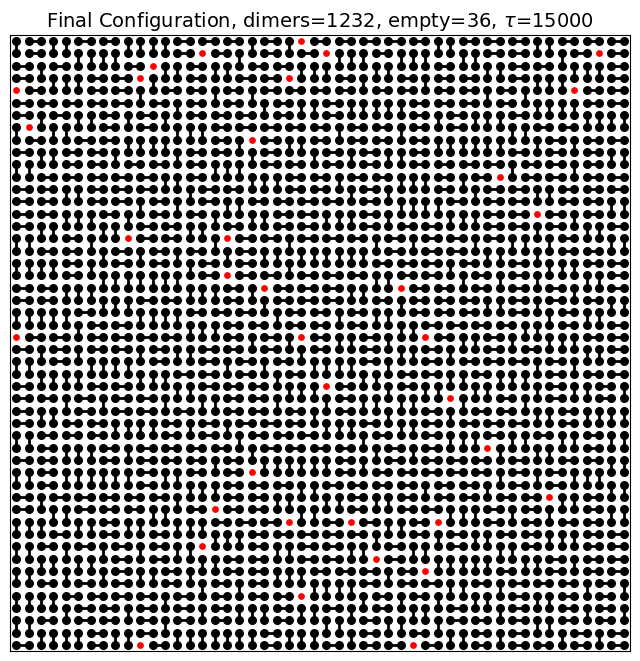

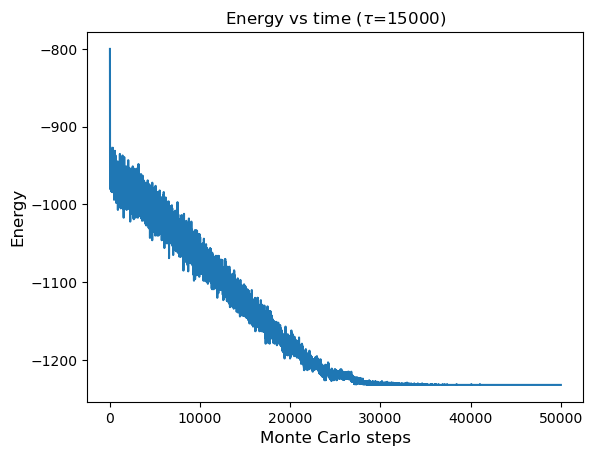

In [44]:
step = snapshots[-1]   # we take the last snapshot
lattice, dimers = results[step]

plt.figure(figsize=(8, 8))

# plot punti
for i in range(L):
    for j in range(L):
        plt.scatter(j, i, c='red', s=15)

# plot dimeri
for ((i1, j1), (i2, j2)) in dimers:
    plt.plot([j1, j2], [i1, i2], 'k-', lw=2)
    plt.scatter([j1, j2], [i1, i2], c='black', s=30)

plt.xlim(-0.5, L - 0.5)
plt.ylim(-0.5, L - 0.5)
plt.gca().invert_yaxis()
plt.xticks([])
plt.yticks([])

plt.title(f"Final Configuration, dimers={len(dimers)}, empty={L*L - 2*len(dimers)}, $\\tau$=15000", fontsize = 14)
plt.show()

# ============================================================
# 7. PLOT ENERGY VS TIME
# ============================================================
plt.plot(times, energies)
plt.xlabel("Monte Carlo steps", fontsize = 12)
plt.ylabel("Energy", fontsize = 12)
plt.title("Energy vs time ($\\tau$=15000)", fontsize = 12)
plt.show()


Exercise 3

In [45]:
import math

class LCG:
    def __init__(self, seed=123456789, a=1664525, c=1013904223, m=2**32): #taken from Wikipedia
        self.state = seed % m
        self.a = a
        self.c = c
        self.m = m
    
    def random(self):
        # returns a uniform in [0,1)
        self.state = (self.a * self.state + self.c) % self.m
        return self.state / self.m
    
    def random_array(self, n):
        return np.array([self.random() for _ in range(n)], dtype=float)

In [ ]:
def gaussian_array_from_lcg(lcg: LCG, n):
    # Box–Muller transform to get n standard normal variables
    out = np.empty(n, dtype=float)
    i = 0
    while i < n:
        u1 = lcg.random()
        u2 = lcg.random()
        # ensure u1 in (0,1], avoid log(0)
        if u1 <= 0.0:
            continue
        r = math.sqrt(-2.0 * math.log(u1)) #sigma^2=1 , and mu = 0
        theta = 2.0 * math.pi * u2
        z0 = r * math.cos(theta)
        z1 = r * math.sin(theta)
        out[i] = z0
        if i + 1 < n:
            out[i+1] = z1
        i += 2
    return out


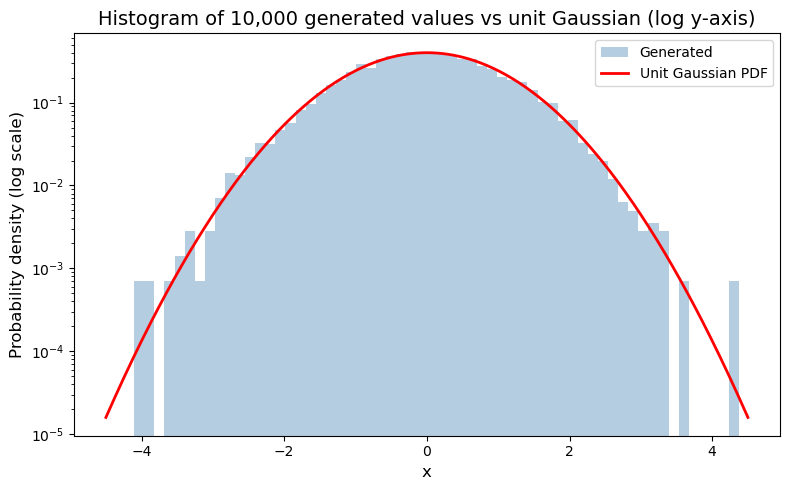

Sample mean = -0.0057, sample std = 1.0010


In [54]:
# Generate 10,000 Gaussian numbers
lcg = LCG(seed=987654321)
N = 10_000
gauss = gaussian_array_from_lcg(lcg, N)

# Plot histogram vs unit Gaussian (log-scale y)
plt.figure(figsize=(8,5))
counts, bins, _ = plt.hist(gauss, bins=60, density=True, alpha=0.4, color='steelblue', label='Generated') #histogram of gaussina number generated
# Unit Gaussian PDF overlay
x = np.linspace(-4.5, 4.5, 500)
pdf = (1.0 / math.sqrt(2.0 * math.pi)) * np.exp(-0.5 * x**2)
plt.plot(x, pdf, 'r-', lw=2, label='Unit Gaussian PDF')
plt.yscale('log')
plt.xlabel('x', fontsize = 12)
plt.ylabel('Probability density (log scale)', fontsize = 12)
plt.title('Histogram of 10,000 generated values vs unit Gaussian (log y-axis)', fontsize = 14)
plt.legend()
plt.tight_layout()
plt.show()

# Quick sanity check: mean and std
print(f"Sample mean = {np.mean(gauss):.4f}, sample std = {np.std(gauss, ddof=1):.4f}")


In [ ]:
def dft(signal):
    # Naive DFT implementation (complex output)
    signal = np.asarray(signal, dtype=float)
    N = signal.size
    k = np.arange(N)
    n = k.reshape((N, 1))
    # exp(-2πi kn/N)
    W = np.exp(-2j * np.pi * n * k / N)
    X = W @ signal
    return X

def power_spectrum(signal):
    X = dft(signal)
    P = np.abs(X)**2 #power spectrum formula
    # Return only positive k (1..N//2) to avoid redundancy and zero frequency dominance
    N = len(signal)
    k = np.arange(1, N//2 + 1)
    return k, P[1:N//2 + 1]


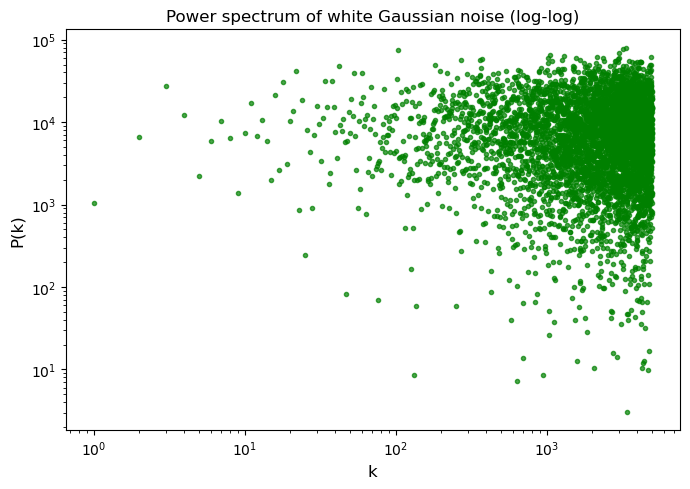

In [ ]:
k_white, P_white = power_spectrum(gauss) #power spectrum

plt.figure(figsize=(7,5))
plt.loglog(k_white, P_white, 'g.', alpha=0.7)
plt.xlabel('k', fontsize = 12)
plt.ylabel('P(k)', fontsize = 12)
plt.title('Power spectrum of white Gaussian noise (log-log)', fontsize = 12)
plt.tight_layout()
plt.show()


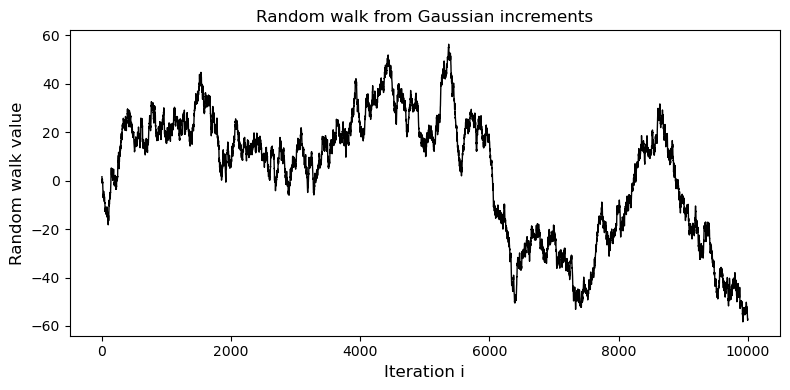

In [52]:
#we now construct a random walk from the gaussian increments

walk = np.cumsum(gauss)  # w_0 implicit, start at 1st increment

plt.figure(figsize=(8,4))
plt.plot(walk, 'k-', lw=1)
plt.xlabel('Iteration i', fontsize = 12)
plt.ylabel('Random walk value', fontsize = 12)
plt.title('Random walk from Gaussian increments', fontsize = 12)
plt.tight_layout()
plt.show()


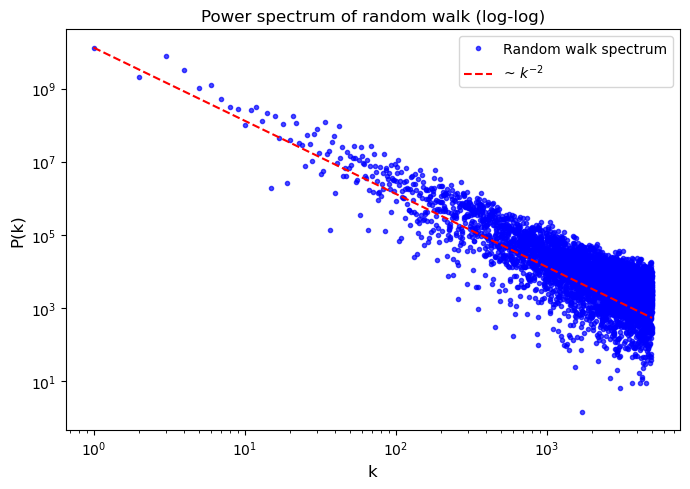

In [53]:
k_walk, P_walk = power_spectrum(walk)

plt.figure(figsize=(7,5))
plt.loglog(k_walk, P_walk, 'b.', alpha=0.7, label='Random walk spectrum')

# Reference line ~ k^{-2} (scaled to match near the first k)
ref = (P_walk[0]) * (k_walk / k_walk[0])**(-2)
plt.loglog(k_walk, ref, 'r--', label='~ $k^{-2}$')

plt.xlabel('k', fontsize = 12)
plt.ylabel('P(k)', fontsize = 12)
plt.title('Power spectrum of random walk (log-log)', fontsize = 12)
plt.legend()
plt.tight_layout()
plt.show()
